In [61]:
import pandas as pd
import numpy as np
import zipfile
import os
!pip install ucimlrepo
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt



In [50]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

Zad 1

In [53]:
heart_disease.data.features.head()
heart_disease.data.features.info()
print(heart_disease.data.features.dtypes)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float6

In [56]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
heart_disease.data.features .columns = column_names

df = heart_disease.data.features


In [60]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_columns:
    df[col] = df[col].astype('category')
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
df_cleaned = df.dropna()
print(df_cleaned.isnull().sum().sum())

ca      4
thal    2
dtype: int64
0


<ipython-input-60-19d28ef07974>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')


Zad 2

In [72]:

print(y.columns)


Index(['num'], dtype='object')


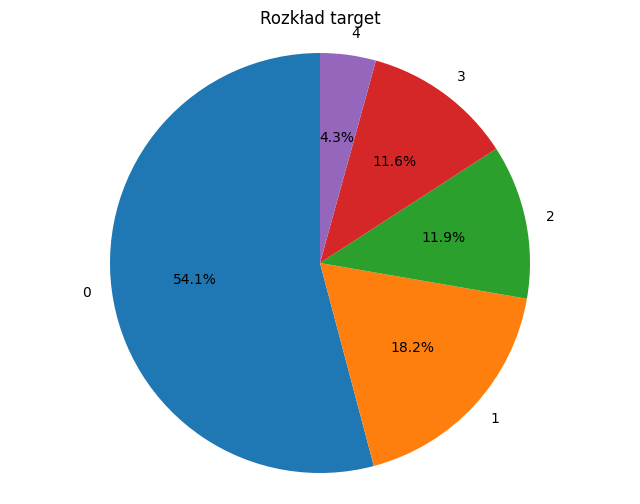

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [73]:
target_counts = y['num'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Rozkład target')
plt.axis('equal')
plt.show()
print(target_counts)

In [74]:
numeric_stats = y.describe()
print(numeric_stats)

              num
count  303.000000
mean     0.937294
std      1.228536
min      0.000000
25%      0.000000
50%      0.000000
75%      2.000000
max      4.000000


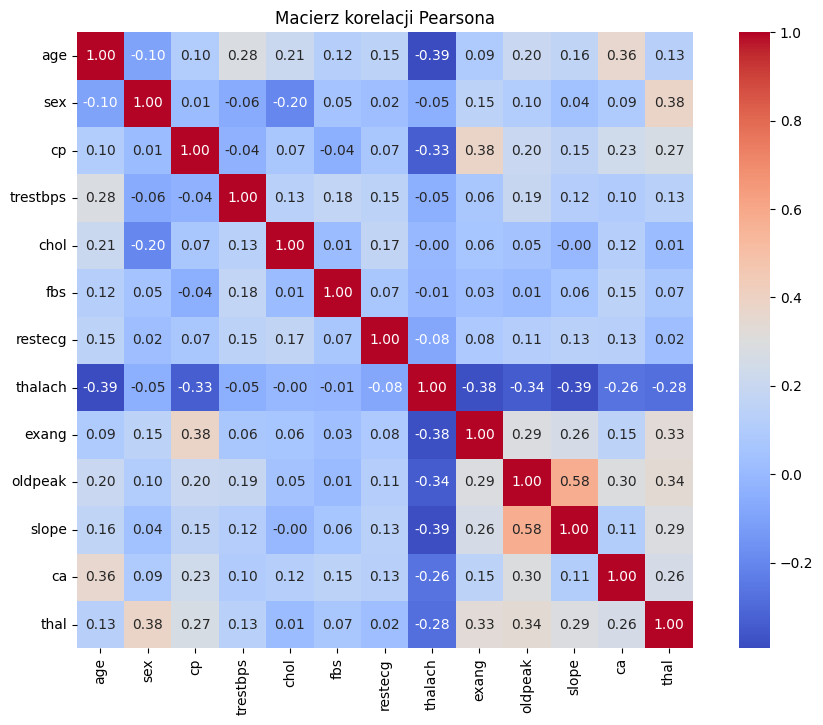

In [78]:
correlation_matrix = df.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Macierz korelacji Pearsona')
plt.show()

In [79]:
correlation_with_age = correlation_matrix['age'].drop('age')
top_correlations = correlation_with_age.abs().nlargest(3)
print(top_correlations)

thalach     0.393806
ca          0.362605
trestbps    0.284946
Name: age, dtype: float64


Zad 3

In [94]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)





{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [100]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for col in categorical_cols:
    if col in X.columns:
        X.loc[:,col] = X[col].astype('category')
    else:
        print(f"Warning: Column '{col}' not found")




In [98]:
# prompt: zbior_1 - losowe 20% wartości ze zbioru oryginalnego (próbkowanie bez uwzględnienia rozkładu dla cechy opisowej - target)

zabior_1 = X.sample(frac=0.2, random_state=42)
print(zabior_1.head())
print(zabior_1.info())

       age  workclass  fnlwgt     education  education-num marital-status  \
7762    18    Private  423024       HS-grad              9  Never-married   
23881   17    Private  178953          12th              8  Never-married   
30507   25  Local-gov  348986       HS-grad              9  Never-married   
28911   20    Private  218215  Some-college             10  Never-married   
19484   47    Private  244025       HS-grad              9  Never-married   

              occupation    relationship                race     sex  \
7762       Other-service   Not-in-family               White    Male   
23881              Sales       Own-child               White  Female   
30507  Handlers-cleaners  Other-relative               Black    Male   
28911              Sales       Own-child               White  Female   
19484  Machine-op-inspct       Unmarried  Amer-Indian-Eskimo    Male   

       capital-gain  capital-loss  hours-per-week native-country  
7762              0             0    

In [102]:
zabior_2 = (X.drop(zabior_1.index).sample(frac=0.8, random_state=42))
print(zabior_2)

       age         workclass  fnlwgt     education  education-num  \
43159   39      Self-emp-inc  128715       HS-grad              9   
2393    20           Private  241951       HS-grad              9   
34000   32         Local-gov  130242     Bachelors             13   
41497   38           Private  278403     Bachelors             13   
45858   34  Self-emp-not-inc  169186       HS-grad              9   
...    ...               ...     ...           ...            ...   
15060   31           Private  217803       HS-grad              9   
18068   39       Federal-gov   30916  Some-college             10   
32098   45           Private  170871       HS-grad              9   
2390    30      Self-emp-inc   78530       HS-grad              9   
19551   71           Private  180117          10th              6   

           marital-status         occupation   relationship   race     sex  \
43159  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2393        Nev

In [109]:
zbior_3 = X.sample(frac=0.2, random_state=42)
print(zbior_3)

       age         workclass  fnlwgt     education  education-num  \
7762    18           Private  423024       HS-grad              9   
23881   17           Private  178953          12th              8   
30507   25         Local-gov  348986       HS-grad              9   
28911   20           Private  218215  Some-college             10   
19484   47           Private  244025       HS-grad              9   
...    ...               ...     ...           ...            ...   
4178    49           Private  166789       HS-grad              9   
43046   56  Self-emp-not-inc  118614       Masters             14   
18798   21           Private  205838       HS-grad              9   
29519   38           Private  194304  Some-college             10   
550     46  Self-emp-not-inc  245724  Some-college             10   

           marital-status         occupation    relationship  \
7762        Never-married      Other-service   Not-in-family   
23881       Never-married              Sale

In [110]:
print(zbior_1['capital-loss'].mean())
print(zabior_2['capital-loss'].mean())
print(zbior_3['capital-loss'].mean())

88.41410728910729
88.60123484436482
88.41410728910729


In [113]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(zbior_1['capital-loss'].dropna(), zbior_3['capital-loss'].dropna())
print(f"Statystyka t: {t_stat}, p-value: {p_value}")

Statystyka t: 0.0, p-value: 1.0


3.2

In [118]:
white_capital_gain = X[X['race'] == 'White']['capital-gain'].dropna()
other_capital_gain = X[X['race'] != 'White']['capital-gain'].dropna()
t_stat, p_value = stats.ttest_ind(white_capital_gain, other_capital_gain)
print(f"Statystyka t: {t_stat}, p-value: {p_value}")


Statystyka t: 3.271235973752524, p-value: 0.0010715272777762003


Przyjmuję hipotezę

3.3

In [121]:
from scipy.stats import f_oneway


In [123]:
groups = [group['capital-gain'].dropna() for name, group in X.groupby('race')]
f_stat, p_value_anova = f_oneway(*groups)
print(f"Statystyka F: {f_stat}, p-value: {p_value_anova}")


Statystyka F: 7.543538179877224, p-value: 4.529130908980212e-06


Jest roznica istotna

Zad 4

In [127]:
X['age_group'] = X['age'].apply(lambda x: '<40' if x < 40 else '>=40')
contingency_table = pd.crosstab(X['age_group'], X['capital-loss'])
print(contingency_table)

capital-loss   0     155   213   323   419   625   653   810   880   974   \
age_group                                                                   
<40           26409     1     3     1     1     5     1     0     4     2   
>=40          20151     0     2     4     2    12     3     2     2     0   

capital-loss  ...  2559  2603  2754  2824  3004  3175  3683  3770  3900  4356  
age_group     ...                                                              
<40           ...     6     4     1     7     1     0     0     3     0     0  
>=40          ...    11     3     1     7     4     2     2     1     2     3  

[2 rows x 99 columns]


In [131]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(expected)


[[2.61617591e+04 5.61893452e-01 2.80946726e+00 2.80946726e+00
  1.68568036e+00 9.55218869e+00 2.24757381e+00 1.12378690e+00
  3.37136071e+00 1.12378690e+00 6.18082798e+00 2.24757381e+00
  3.37136071e+00 6.18082798e+00 5.61893452e+00 1.96662708e+01
  2.24757381e+00 5.61893452e-01 1.68568036e+00 3.98944351e+01
  1.46092298e+01 1.68568036e+00 5.61893452e-01 2.41614185e+01
  6.74272143e+00 1.68568036e+01 3.48373940e+01 5.05704107e+00
  3.48373940e+01 6.18082798e+00 1.34854429e+01 1.68568036e+00
  6.18082798e+00 5.05704107e+00 1.96662708e+01 2.80946726e+01
  2.13519512e+01 1.57330167e+01 5.05704107e+00 1.68568036e+00
  3.25898202e+01 2.47233119e+01 1.12378690e+00 1.12378690e+01
  2.24757381e+00 2.80946726e+00 1.68568036e+00 3.76468613e+01
  5.61893452e-01 3.31517137e+01 1.30921174e+02 1.70815610e+02
  5.61893452e-01 1.68568036e+00 1.57330167e+01 1.42159043e+02
  2.02281643e+01 1.96662708e+01 1.85424839e+01 6.74272143e+00
  1.62949101e+01 8.99029524e+00 5.61893452e-01 3.93325417e+00
  2.8094

In [132]:
alpha = 0.05
if p < alpha:
    print("Obserwowane różnice są statystycznie istotne.")
else:
    print("Obserwowane różnice nie są statystycznie istotne.")

Obserwowane różnice są statystycznie istotne.
